In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import A2C
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

from res_mgmt.envs.generator import generate_jobs
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

D:\Programs\Miniconda3\envs\res-mgmt-rl-cuda-dev\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


In [7]:
num_resource_type = 2
time_size = 20
resource_size = 20
num_job_slot = 10
n = 10**2

env = ResMgmtEnv(**{
    "num_resource_type": num_resource_type,
    "time_size": time_size,
    "resource_size": resource_size,
    "num_job_slot": num_job_slot,
    "max_num_job": n,
})


model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    device="cpu",
    ent_coef=0.05,
)

model.learn(
    total_timesteps=100,
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
LOG: step (0)
LOG: Chose action (5)
LOG: Job ID (4)
LOG: Pos (0)
LOG: reward (0)
[19 19 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 15 15 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20  6  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  0  0  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7  7  7  7  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  8  0  0
  0  0  0  0  0  0  0 

In [1]:
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv
env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
obs = env.reset()
print(obs.shape)

action = env.action_space.sample()
print("Action:\n", action)
obs, reward, done, info = env.step(action)
print("Step:\n", obs, reward, done, info)

(41,)
Action:
 0
Step:
 [  3   3   3   3   3   3   3   3   3   3   2   1   1   0   0   2   2   2
   2   0   3   2   2   0   0   2   2   3   1   3   2   2   0   0   0   3
   3   2   0   0 997] -301.56666666666666 False {}


In [1]:
from stable_baselines3.common.env_checker import check_env
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
check_env(env, warn=True)

D:\Programs\Miniconda3\envs\res-mgmt-rl-cuda-dev\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


In [2]:
from stable_baselines3 import A2C
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
model = A2C('MlpPolicy', env, verbose=1)

evaluate_policy(model, env, n_eval_episodes=2)


In [26]:
model = A2C.load("a2c_res_mgmt")

num_resource_type = 2
time_size = 20
resource_size = 20
num_job_slot = 10
n = 10**2

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=num_job_slot,
    max_num_job=n,
)

observation = env.reset()
t = 0
while True:
    t += 1
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # if t % 1000 == 0:
    # print(t, action)
    # env.my_render(f"render/{t}.png")
    if done or t > 5000:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

Episode finished after 200 timesteps


D:\Programs\Miniconda3\envs\res-mgmt-rl-cuda-dev\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


(array([ 1568.,  6213., 18167., 34819.,     0., 42631., 34499., 18108.,
         6333.,  1597.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

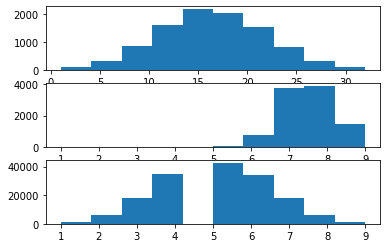

In [2]:
from res_mgmt.envs.generator import generate_jobs
import numpy as np
import matplotlib.pyplot as plt

jobs = generate_jobs(10, 50, 10)
jobs = jobs.reshape(10000, 50, 10)
def duration(image):
    return np.max(np.where(image == True), axis=1)[0] + 1
def max_req(image):
    return np.max(np.where(image == True), axis=1)[1] + 1
def reqs(image):
    t = np.where(image == True)
    if t[0].size == 0:
        return 0
    return np.max(np.where(image == True)) + 1
durations = [duration(jobs[i]) for i in range(jobs.shape[0])]
max_reqs = [max_req(jobs[i]) for i in range(jobs.shape[0])]
fig, (ax0, ax1, ax2) = plt.subplots(3)
ax0.hist(durations)
ax1.hist(max_reqs)
jobs = jobs.reshape(500000, 10)
reqss = [reqs(jobs[i]) for i in range(jobs.shape[0]) if reqs(jobs[i]) != 0]
ax2.hist(reqss)



In [19]:
num_resource_type = 2
time_size = 20
resource_size = 20
num_job_slot = 10

# Parallel environments
env = make_vec_env(ResMgmtEnv, n_envs=4, env_kwargs={
    "num_resource_type": num_resource_type,
    "time_size": time_size,
    "resource_size": resource_size,
    "num_job_slot": num_job_slot,
    "max_num_job": 10**2,
})

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
    device="cpu",
)
# model.learn(total_timesteps=25000)
model.learn(total_timesteps=10000)
# model.learn(total_timesteps=50000)
model.save("a2c_res_mgmt")

del model  # remove to demonstrate saving and loading

Using cpu device
Logging to ./a2c_res_mgmt_tensorboard/A2C_14
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 193       |
|    ep_rew_mean        | -2.34e+03 |
| time/                 |           |
|    fps                | 129       |
|    iterations         | 100       |
|    time_elapsed       | 15        |
|    total_timesteps    | 2000      |
| train/                |           |
|    entropy_loss       | -2.35     |
|    explained_variance | 4.29e-06  |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -63.8     |
|    value_loss         | 1.71e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 194       |
|    ep_rew_mean        | -2.34e+03 |
| time/                 |           |
|    fps                | 126       |
|    iterations         | 200       |
|    time_elapsed       | 

In [11]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 2
time_size = 5
resource_size = 3

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=3,
    max_num_job=10**3,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)
# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)
model.save("a2c_res_mgmt")

del model  # remove to demonstrate saving and loading

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_res_mgmt_tensorboard/A2C_7
------------------------------------
| time/                 |          |
|    fps                | 141      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.25    |
|    explained_variance | 2.5e-06  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -711     |
|    value_loss         | 5.64e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 145      |
|    iterations         | 200      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.942   |
|    explained_variance | 0        |
|    learn

In [3]:
model = A2C.load("after_eva_test")
# model = A2C.load("a2c_res_mgmt_super_long_train")
# model = A2C.load("a2c_res_mgmt")

num_resource_type = 2
time_size = 20
resource_size = 20
num_job_slot = 10
n = 10**2

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=num_job_slot,
    max_num_job=n,
)

obs = env.reset()
t = 0
max_iteration = 10 ** 3
while True:
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if t % 1 == 0:
        print(t, action, reward)
        env.my_render(f"render/{t}.png")
    if done or t > max_iteration:
        print("Episode finished after {} timesteps".format(t))
        break
    t += 1

env.close()

D:\Programs\Miniconda3\envs\res-mgmt-rl-cuda-dev\lib\site-packages\cloudpickle\cloudpickle.py:821: UserWarning: A pickle file created using an old (<=1.4.1) version of cloudpickle is currently being loaded. This is not supported by cloudpickle and will break in cloudpickle 1.7
  "will break in cloudpickle 1.7", category=UserWarning


LOG: step (0)
LOG: Chose action (10)
LOG: Job ID (9)
LOG: Pos (0)
LOG: reward (0)
[13 13 13 13 13 13 13 13 13 13 13 13 20 20 20 20 20 20 20 20 19 19 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20  1  1  1  1  1  1  1  1
  1  1  1  1  1  0  0  0  0  0  0  0  7  7  7  7  7  7  7  7  7  7  7  7
  7  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0

In [ ]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 2
time_size = 5
resource_size = 3

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=3,
    max_num_job=10,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)

# episode = 10
episode = 2

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)


mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# env.close()

In [ ]:
import numpy as np
jobs = np.array(
    [[[[True,  True, False],
        [True, False,  True],
        [True, False,  True],
        [False, False,  True],
        [False,  True,  True]],

      [[False, False,  True],
        [True,  True,  True],
        [False,  True,  True],
        [False, False, False],
        [False,  True, False]]],


      [[[False, False,  True],
        [False,  True, False],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]],

      [[False, False,  True],
        [True, False, False],
        [True, False,  True],
        [True,  True, False],
        [True, False, False]]],


      [[[True, False, False],
        [False, False,  True],
        [True, False,  True],
        [True,  True, False],
        [False, False,  True]],

      [[True,  True,  True],
        [True, False,  True],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]]],


      [[[False, False,  True],
        [True,  True, False],
        [False,  True, False],
        [False,  True,  True],
        [True, False, False]],

      [[False,  True, False],
        [False,  True, False],
        [True,  True, False],
        [False, False, False],
        [True, False,  True]]],


      [[[True, False,  True],
        [False,  True,  True],
        [False,  True,  True],
        [True, False, False],
        [True, False,  True]],

      [[True,  True, False],
        [False,  True,  True],
        [False,  True,  True],
        [True, False,  True],
        [True,  True,  True]]]]
)
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

short duration: 1 - 3
long duration: 10 - 15
dominant resource: 5.0 - 10.0
other resource: 1.0 - 2.0


(0.8, 0.5)

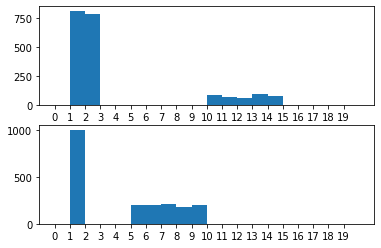

In [29]:
print(f"short duration: {1} - {3}")
print(f"long duration: {10} - {15}")
print(f"dominant resource: {0.25*20} - {0.5*20}")
print(f"other resource: {0.05*20} - {0.1*20}")

jobs = generate_jobs(2, 20, 20)
jobs = jobs.reshape(2000, 20, 20)
def duration(image):
    return np.max(np.where(image == True), axis=1)[0] + 1
def max_req(image):
    return np.max(np.where(image == True), axis=1)[1] + 1
def reqs(image):
    t = np.where(image == True)
    if t[0].size == 0:
        return 0
    return np.max(np.where(image == True)) + 1
durations = [duration(jobs[i]) for i in range(jobs.shape[0])]
max_reqs = [max_req(jobs[i]) for i in range(jobs.shape[0])]
fig, (ax0, ax1) = plt.subplots(2)
hist1, _, _ = ax0.hist(durations, bins=20, range=(0, 20))
hist2, _, _ = ax1.hist(max_reqs, bins=20, range=(0, 20))
ax0.set_xticks(np.arange(0, 20, 1))
ax1.set_xticks(np.arange(0, 20, 1))
sum(hist1[:5]) / sum(hist1), sum(hist2[:4]) / sum(hist2)

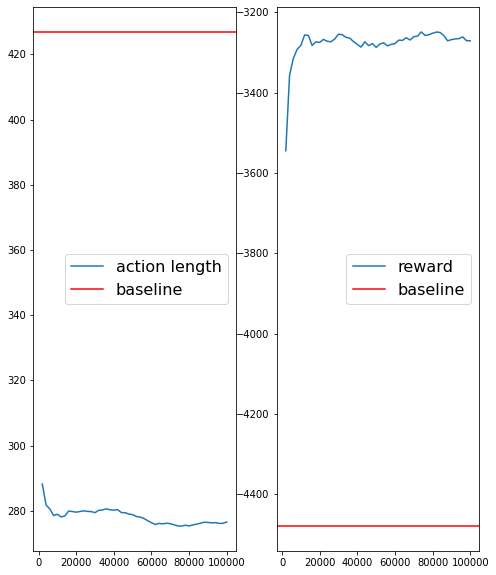

In [80]:
import csv
with open("presentation/run-presentation_A2C_2-tag-rollout_ep_len_mean.csv", newline='') as csvfile:
    ep_len_mean = list(csv.reader(csvfile, delimiter=','))[1:]
with open("presentation/run-presentation_A2C_2-tag-rollout_ep_rew_mean.csv", newline='') as csvfile:
    ep_rew_mean = list(csv.reader(csvfile, delimiter=','))[1:]

ep_len_mean = [[float(x) for x in row[1:]] for row in ep_len_mean]
ep_rew_mean = [[float(x) for x in row[1:]] for row in ep_rew_mean]
ep_len_mean = np.array(ep_len_mean)
ep_rew_mean = np.array(ep_rew_mean)

fig, (ax0, ax1) = plt.subplots(1, 2)
# ax0.set_yscale('log')
# ax1.set_yscale('log')
ax0.plot(ep_len_mean[:,0], ep_len_mean[:,1], label="action length")
ax0.axhline(y=426.9, c='r', label="baseline")
ax1.plot(ep_rew_mean[:,0], ep_rew_mean[:,1], label="reward")
ax1.axhline(y=-4479.774999999999, c='r', label="baseline")
ax0.legend(prop={'size': 16})
ax1.legend(prop={'size': 16})
# plt.figure(figsize=(14, 6), dpi=80)
fig = plt.gcf()
fig.set_size_inches(8, 10)
plt.savefig('foo.png')